<a href="https://colab.research.google.com/github/reiinakano/neural-painters/blob/master/notebooks/learning_human_strokes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optionally connect to Google Drive

In [1]:
#from google.colab import drive
#drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /drive


# Install MyPaint

In [0]:
# Install mypaint
!apt-get update
!apt-get install libjson-c-dev libgirepository1.0-dev libglib2.0-dev
!apt-get install autotools-dev intltool gettext libtool
!apt-get install swig python-setuptools gettext g++
!apt-get install -y libgtk-3-dev python-gi-dev
!apt-get install -y libpng-dev liblcms2-dev libjson-c-dev
!apt-get install -y gir1.2-gtk-3.0 python-gi-cairo
!apt-get install scons

!wget https://github.com/mypaint/libmypaint/releases/download/v1.3.0/libmypaint-1.3.0.tar.xz
!tar -xvf libmypaint-1.3.0.tar.xz
!mv libmypaint-1.3.0 libmypaint

!cd libmypaint && ./configure && make install

!wget https://github.com/mypaint/mypaint/releases/download/v1.2.1/mypaint-1.2.1.tar.xz
!tar -xvf mypaint-1.2.1.tar.xz
!mv mypaint-1.2.1 mypaint
!cd mypaint && scons && scons install

!ldconfig

!pip install ipdb tqdm pathlib cloudpickle matplotlib

In [3]:
!pip install future-fstrings

In [4]:
!git clone https://github.com/reiinakano/SPIRAL-tensorflow.git
!cd SPIRAL-tensorflow && git checkout reiinakano-patch-2  #reiinakano-patches
!cd SPIRAL-tensorflow && git pull

Cloning into 'SPIRAL-tensorflow'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 154 (delta 3), reused 0 (delta 0), pack-reused 146
Receiving objects: 100% (154/154), 1.36 MiB | 3.49 MiB/s, done.
Resolving deltas: 100% (75/75), done.
Branch 'reiinakano-patch-2' set up to track remote branch 'reiinakano-patch-2' from 'origin'.
Switched to a new branch 'reiinakano-patch-2'
Already up to date.


In [5]:
! wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip ngrok-stable-linux-amd64.zip

--2019-04-13 13:25:36--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.173.32.212, 34.206.9.96, 35.173.6.94, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.173.32.212|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14977695 (14M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  14.28M  14.4MB/s    in 1.0s    

2019-04-13 13:25:38 (14.4 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [14977695/14977695]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


# Download pre-trained VAE and GAN Neural Painters

I have prepared pre-trained VAE and GAN Neural Painters here but feel free to use your own if you wish.

Place the VAE in tf_vae and the GAN in tf_gan3

In [0]:
!mkdir tf_vae
!wget -O tf_vae/vae-300000.index 'https://docs.google.com/uc?export=download&id=1ulHdDxebH46m_0ZoLa2Wsz_6vStYqJQm'
!wget -O tf_vae/vae-300000.meta 'https://docs.google.com/uc?export=download&id=1nHN_i7Ro9g0lP4y_YQCvIWrOVX1I3CJa'
!wget -O tf_vae/vae-300000.data-00000-of-00001 'https://docs.google.com/uc?export=download&id=18rAJcUJwFJOAcjzsabtqK12udsHMZkVk'
!wget -O tf_vae/checkpoint 'https://docs.google.com/uc?export=download&id=18U4qMNBdyvEk-Y-Mr3MNPEHSHxhcO9hn'

!mkdir tf_gan3
!wget -O tf_gan3/gan-571445.meta 'https://docs.google.com/uc?export=download&id=15kEG1Tiu2FUg5SILVt_9yOsSd3QHwVGA'
!wget -O tf_gan3/gan-571445.index 'https://docs.google.com/uc?export=download&id=11uyFbQsRZoWa9Yq52AFXDXPjPQoGF_ER'
!wget -O tf_gan3/gan-571445.data-00000-of-00001 'https://docs.google.com/uc?export=download&id=11cbvz-CH3KvfZEwNQ2OUujfbf6AKNoQa'
!wget -O tf_gan3/checkpoint 'https://docs.google.com/uc?export=download&id=1A539u51t0L31Ab1M2uPUV2SsCFsNDQRo'


# Imports

If you encounter `SyntaxError: encoding problem: future_fstrings` then please "Restart Runtime" (NOT "Reset all Runtimes") and start from this point. I think this is because we are installing a library "future-fstrings" but it won't get loaded in until the runtime is reset :( If someone knows a fix please let me know.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import json

import tensorflow as tf
import os
import random
import time
from collections import namedtuple


import sys
sys.path.append('mypaint')
sys.path.append('SPIRAL-tensorflow')

from tqdm import tqdm
import tensorflow as tf
from PIL import Image, ImageDraw
from collections import defaultdict

from lib import surface, tiledsurface, brush
import utils as ut
from envs.mypaint_utils import *

import moviepy.editor as mpy
from IPython.display import display

import tensorflow.contrib.layers as tcl

import imageio


print(tf.__version__)

1.13.1


In [0]:
imageio.plugins.freeimage.download()

In [0]:
class args:
  jump=True
  curve=True
  screen_size=64
  location_size=32
  color_channel=3
  brush_path='SPIRAL-tensorflow/assets/brushes/dry_brush.myb'
  train=True
  data_dir=Path('data')

# paint environment

In [0]:
class PaintMode:
  STROKES_ONLY = 0
  JUMP_STROKES = 1
  CONNECTED_STROKES = 2

class ColorEnv():
    head = 0.25
    tail = 0.75
    
    # all 0 to 1
    actions_to_idx = {
        'pressure': 0,
        'size': 1,
        'control_x': 2,
        'control_y': 3,
        'end_x': 4,
        'end_y': 5,
        'color_r': 6,
        'color_g': 7,
        'color_b': 8,
        'start_x': 9,
        'start_y': 10,
        'entry_pressure': 11,
    }

    def __init__(self, args, paint_mode=PaintMode.JUMP_STROKES):
        self.args = args
        self.paint_mode = paint_mode

        # screen
        self.screen_size = args.screen_size
        self.height, self.width = self.screen_size, self.screen_size
        self.observation_shape = [
                self.height, self.width, args.color_channel]

        # location
        self.location_size = args.location_size
        self.location_shape = [self.location_size, self.location_size]
        
        self.prev_x, self.prev_y, self.prev_pressure = None, None, None
    
    @staticmethod
    def pretty_print_action(ac):
        for k, v in ColorEnv.actions_to_idx.items():
            print(k, ac[v])
    
    def random_action(self):
        return np.random.uniform(size=[len(self.actions_to_idx)])
      
    def reset(self):
        self.intermediate_images = []
        self.prev_x, self.prev_y, self.prev_pressure = None, None, None

        self.s = tiledsurface.Surface()
        self.s.flood_fill(0, 0, (255, 255, 255), (0, 0, 64, 64), 0, self.s)
        self.s.begin_atomic()

        with open(self.args.brush_path) as fp:
            self.bi = brush.BrushInfo(fp.read())
        self.b = brush.Brush(self.bi)

    def draw(self, ac, s=None, dtime=1):
        # Just added this
        if self.paint_mode == PaintMode.STROKES_ONLY:
          self.s.clear()
          self.s.flood_fill(0, 0, (255, 255, 255), (0, 0, 64, 64), 0, self.s)
          self.s.end_atomic()
          self.s.begin_atomic()
        
        if s is None:
            s = self.s

        s_x, s_y = ac[self.actions_to_idx['start_x']]*64, ac[self.actions_to_idx['start_y']]*64  
        e_x, e_y = ac[self.actions_to_idx['end_x']]*64, ac[self.actions_to_idx['end_y']]*64
        c_x, c_y = ac[self.actions_to_idx['control_x']]*64, ac[self.actions_to_idx['control_y']]*64
        color = (
            ac[self.actions_to_idx['color_r']],
            ac[self.actions_to_idx['color_g']],
            ac[self.actions_to_idx['color_b']],
        )
        pressure = ac[self.actions_to_idx['pressure']]*0.8
        entry_pressure = ac[self.actions_to_idx['entry_pressure']]*0.8
        size = ac[self.actions_to_idx['size']] * 2.
        
        if self.paint_mode == PaintMode.CONNECTED_STROKES:
            if self.prev_x is not None:
                s_x, s_y, entry_pressure = self.prev_x, self.prev_y, self.prev_pressure
            self.prev_x, self.prev_y, self.prev_pressure = e_x, e_y, pressure

        self.b.brushinfo.set_color_rgb(color)
        
        self.b.brushinfo.set_base_value('radius_logarithmic', size)

        # Move brush to starting point without leaving it on the canvas.
        self._stroke_to(s_x, s_y, 0)

        self._draw(s_x, s_y, e_x, e_y, c_x, c_y, entry_pressure, pressure, size, color, dtime)

    def _draw(self, s_x, s_y, e_x, e_y, c_x, c_y,
              entry_pressure, pressure, size, color, dtime):

        # if straight line or jump
        if pressure == 0:
            self.b.stroke_to(
                    self.s.backend, e_x, e_y, pressure, 0, 0, dtime)
        else:
            self.curve(c_x, c_y, s_x, s_y, e_x, e_y, entry_pressure, pressure)
            
        # Relieve brush pressure for next jump
        self._stroke_to(e_x, e_y, 0)

        self.s.end_atomic()
        self.s.begin_atomic()

    # sx, sy = starting point
    # ex, ey = end point
    # kx, ky = curve point from last line
    # lx, ly = last point from InteractionMode update
    def curve(self, cx, cy, sx, sy, ex, ey, entry_pressure, pressure):
        #entry_p, midpoint_p, junk, prange2, head, tail
        entry_p, midpoint_p, prange1, prange2, h, t = \
                self._line_settings(entry_pressure, pressure)

        points_in_curve = 100
        mx, my = midpoint(sx, sy, ex, ey)
        length, nx, ny = length_and_normal(mx, my, cx, cy)
        cx, cy = multiply_add(mx, my, nx, ny, length*2)
        x1, y1 = difference(sx, sy, cx, cy)
        x2, y2 = difference(cx, cy, ex, ey)
        head = points_in_curve * h
        head_range = int(head)+1
        tail = points_in_curve * t
        tail_range = int(tail)+1
        tail_length = points_in_curve - tail

        # Beginning
        px, py = point_on_curve_1(1, cx, cy, sx, sy, x1, y1, x2, y2)
        length, nx, ny = length_and_normal(sx, sy, px, py)
        bx, by = multiply_add(sx, sy, nx, ny, 0.25)
        self._stroke_to(bx, by, entry_p)
        pressure = abs(1/head * prange1 + entry_p)
        self._stroke_to(px, py, pressure)

        for i in xrange(2, head_range):
            px, py = point_on_curve_1(i, cx, cy, sx, sy, x1, y1, x2, y2)
            pressure = abs(i/head * prange1 + entry_p)
            self._stroke_to(px, py, pressure)

        # Middle
        for i in xrange(head_range, tail_range):
            px, py = point_on_curve_1(i, cx, cy, sx, sy, x1, y1, x2, y2)
            self._stroke_to(px, py, midpoint_p)

        # End
        for i in xrange(tail_range, points_in_curve+1):
            px, py = point_on_curve_1(i, cx, cy, sx, sy, x1, y1, x2, y2)
            pressure = abs((i-tail)/tail_length * prange2 + midpoint_p)
            self._stroke_to(px, py, pressure)

        return pressure

    def _stroke_to(self, x, y, pressure, duration=0.1):
        self.b.stroke_to(
                self.s.backend,
                x, y,
                pressure,
                0.0, 0.0,
                duration)
        self.s.end_atomic()
        self.s.begin_atomic()
        self.intermediate_images.append(self.image)

    def save_image(self, path="test.png"):
        Image.fromarray(self.image.astype(np.uint8).squeeze()).save(path)
        #self.s.save_as_png(path, alpha=False)

    @property
    def image(self):
        rect = [0, 0, self.height, self.width]
        scanline_strips = \
                surface.scanline_strips_iter(self.s, rect)
        return next(scanline_strips)

    def _line_settings(self, entry_pressure, pressure):
        p1 = entry_pressure
        p2 = (entry_pressure + pressure) / 2
        p3 = pressure
        if self.head == 0.0001:
            p1 = p2
        prange1 = p2 - p1
        prange2 = p3 - p2
        return p1, p2, prange1, prange2, self.head, self.tail


# mnist environment

In [0]:
class MNISTDispenser():

    def __init__(self, data_dir=Path('data'), screen_size=64):
        self.data_dir = data_dir
        self.height, self.width = screen_size, screen_size
        self.prepare_mnist()

    def get_random_target(self, num=1, squeeze=False):
        random_idxes = np.random.choice(self.real_data.shape[0], num, replace=False)
        random_image = self.real_data[random_idxes]
        if squeeze:
            random_image = np.squeeze(random_image, 0)
        return random_image

    def prepare_mnist(self):
        ut.io.makedirs(self.data_dir)

        # ground truth MNIST data
        mnist_dir = self.data_dir / 'mnist'
        mnist = tf.contrib.learn.datasets.DATASETS['mnist'](str(mnist_dir))

        pkl_path = mnist_dir / 'mnist_dict.pkl'

        if pkl_path.exists():
            mnist_dict = ut.io.load_pickle(pkl_path)
        else:
            mnist_dict = defaultdict(lambda: defaultdict(list))
            for name in ['train', 'test', 'valid']:
                for num in range(10):
                    filtered_data = \
                            mnist.train.images[mnist.train.labels == num]
                    filtered_data = \
                            np.reshape(filtered_data, [-1, 28, 28])

                    iterator = tqdm(filtered_data,
                                    desc="[{}] Processing {}".format(name, num))
                    for idx, image in enumerate(iterator):
                        # XXX: don't know which way would be the best
                        resized_image = ut.io.imresize(
                                image, [self.height, self.width],
                                interp='cubic')
                        mnist_dict[name][num].append(
                                np.expand_dims(resized_image, -1))
            ut.io.dump_pickle(pkl_path, mnist_dict)

        mnist_dict = mnist_dict['train'] # as opposed to test

        data = []
        for num in range(10):
            data.append(mnist_dict[int(num)])

        self.real_data = 255 - np.concatenate([d for d in data])
        self.real_data_labels = np.sort(mnist.train.labels)

In [0]:
mnist_dispenser = MNISTDispenser()


In [7]:
mnist_dispenser.get_random_target().shape

(1, 64, 64, 1)

# VAE Painter

In [0]:
class ConvVAE(object):
  def __init__(self, z_size=64, batch_size=100, learning_rate=0.0001, kl_tolerance=0.5, is_training=True, reuse=False, gpu_mode=True, graph=None):
    self.z_size = z_size
    self.batch_size = batch_size
    self.learning_rate = learning_rate
    self.is_training = is_training
    self.kl_tolerance = kl_tolerance
    self.reuse = reuse
    # Is it okay to comment this out? with tf.variable_scope('conv_vae', reuse=self.reuse):
    if not gpu_mode:
      with tf.device('/cpu:0'):
        tf.logging.info('conv_vae using cpu.')
        self._build_graph(graph)
    else:
      tf.logging.info('conv_vae using gpu.')
      self._build_graph(graph)
    self._init_session()
  
  def build_decoder(self, z, reuse=False):
    with tf.variable_scope('decoder', reuse=reuse):
      h = tf.layers.dense(z, 4*256, name="fc")
      h = tf.reshape(h, [-1, 1, 1, 4*256])
      h = tf.layers.conv2d_transpose(h, 128, 5, strides=2, activation=tf.nn.relu, name="deconv1")
      h = tf.layers.conv2d_transpose(h, 64, 5, strides=2, activation=tf.nn.relu, name="deconv2")
      h = tf.layers.conv2d_transpose(h, 32, 6, strides=2, activation=tf.nn.relu, name="deconv3")
      return tf.layers.conv2d_transpose(h, 3, 6, strides=2, activation=tf.nn.sigmoid, name="deconv4")
  
  def build_predictor(self, actions, reuse=False, is_training=False):
    with tf.variable_scope('predictor', reuse=reuse):
      h = tf.layers.dense(actions, 256, activation=tf.nn.leaky_relu, name="fc1")
      h = tf.layers.batch_normalization(h, training=is_training, name="bn1")
      h = tf.layers.dense(h, 64, activation=tf.nn.leaky_relu, name="fc2")
      h = tf.layers.batch_normalization(h, training=is_training, name="bn2")
      h = tf.layers.dense(h, 64, activation=tf.nn.leaky_relu, name="fc3")
      h = tf.layers.batch_normalization(h, training=is_training, name="bn3")
      return tf.layers.dense(h, self.z_size, name='fc4')
  
  def _build_graph(self, graph):
    if graph is None:
      self.g = tf.Graph()
    else:
      self.g = graph
    with self.g.as_default(), tf.variable_scope('conv_vae', reuse=self.reuse):

      #### autoencoding part
      self.x = tf.placeholder(tf.float32, shape=[None, 64, 64, 3])
      
      # Encoder
      h = tf.layers.conv2d(self.x, 32, 4, strides=2, activation=tf.nn.relu, name="enc_conv1")
      h = tf.layers.conv2d(h, 64, 4, strides=2, activation=tf.nn.relu, name="enc_conv2")
      h = tf.layers.conv2d(h, 128, 4, strides=2, activation=tf.nn.relu, name="enc_conv3")
      h = tf.layers.conv2d(h, 256, 4, strides=2, activation=tf.nn.relu, name="enc_conv4")
      h = tf.reshape(h, [-1, 2*2*256])

      # VAE
      self.mu = tf.layers.dense(h, self.z_size, name="enc_fc_mu")
      self.logvar = tf.layers.dense(h, self.z_size, name="enc_fc_log_var")
      self.sigma = tf.exp(self.logvar / 2.0)
      #self.epsilon = tf.random_normal([self.batch_size, self.z_size])
      self.epsilon = tf.random_normal([tf.shape(self.sigma)[0], self.z_size])
      self.z = self.mu + self.sigma * self.epsilon

      # Decoder
      self.y = self.build_decoder(self.z)
      
      #### predicting part
      self.actions = tf.placeholder(tf.float32, shape=[None, 12])
      self.predicted_z = self.build_predictor(self.actions, is_training=self.is_training)
      self.predicted_y = self.build_decoder(self.predicted_z, reuse=True)
      
      # train ops
      if self.is_training:
        self.global_step = tf.Variable(0, name='global_step', trainable=False)
        self.uneven_multiplier = tf.placeholder_with_default(1.0, [])
        summ_uneven_mult = tf.summary.scalar('uneven_multiplier', self.uneven_multiplier)

        eps = 1e-6 # avoid taking log of zero
        
        mask = tf.reduce_mean(
          self.x,
          reduction_indices = [3]
        )
        stroke_whitespace = tf.equal(mask, 1.0)
        mask = tf.where(stroke_whitespace, tf.ones(tf.shape(mask)), self.uneven_multiplier*tf.ones(tf.shape(mask)))
        mask = tf.reshape(mask, [-1, 64, 64, 1])
        mask = tf.tile(mask, [1, 1, 1, 3])
        summ_mask = tf.summary.image('mask', mask, max_outputs=3)
        print(mask.get_shape())
        
        # reconstruction loss
        self.r_loss = tf.reduce_sum(
          (tf.square(self.x - self.y))*mask,
          reduction_indices = [1,2,3]
        )
        self.r_loss = tf.reduce_mean(self.r_loss)

        # augmented kl loss per dim
        self.kl_loss = - 0.5 * tf.reduce_sum(
          (1 + self.logvar - tf.square(self.mu) - tf.exp(self.logvar)),
          reduction_indices = 1
        )
        self.kl_loss = tf.maximum(self.kl_loss, self.kl_tolerance * self.z_size)
        self.kl_loss = tf.reduce_mean(self.kl_loss)
        
        summ_recon_loss = tf.summary.scalar('recon_loss', self.r_loss)
        summ_kl_loss = tf.summary.scalar('kl_loss', self.kl_loss)
        self.loss = self.r_loss + self.kl_loss
        
        # training the vae
        self.lr = tf.Variable(self.learning_rate, trainable=False)
        summ_lr = tf.summary.scalar('lr', self.lr)
        self.optimizer = tf.train.AdamOptimizer(self.lr)
        grads = self.optimizer.compute_gradients(
            self.loss, 
            tf.global_variables('conv_vae/enc_*')+tf.global_variables('conv_vae/decoder*')) # can potentially clip gradients here.

        self.train_op = self.optimizer.apply_gradients(
          grads, global_step=self.global_step, name='train_step')
        summ_loss = tf.summary.scalar('loss', self.loss)
        
        # training the predictor
        self.predictor_loss = tf.reduce_mean(tf.square(self.predicted_z - self.z))
        self.optimizer2 = tf.train.AdamOptimizer(self.lr)
        grads2 = self.optimizer2.compute_gradients(self.predictor_loss, tf.global_variables('conv_vae/predictor*'))
        with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
          self.train_op2 = self.optimizer2.apply_gradients(
            grads2, global_step=self.global_step, name='train_step2')
        summ_predictor_loss = tf.summary.scalar('predictor_loss', self.predictor_loss)
      
        #summary ops
        summ_inp_img = tf.summary.image('inp_img', self.x, max_outputs=3)
        summ_output_img = tf.summary.image('output_img', self.y, max_outputs=3)
        summ_predicted_output_img = tf.summary.image('predicted_output_img', self.predicted_y, max_outputs=3)
        self.summary_op = tf.summary.merge([
            summ_inp_img, summ_output_img, summ_loss, summ_kl_loss, summ_recon_loss,
            summ_mask, summ_uneven_mult, summ_lr
        ])
        self.summary_op_2 = tf.summary.merge([
            summ_inp_img, summ_predictor_loss, summ_output_img, summ_predicted_output_img, summ_lr
        ])
        

      # initialize vars
      self.init = tf.global_variables_initializer()
  
  def generate_stroke_graph(self, actions):
    with tf.variable_scope('conv_vae', reuse=True):
      with self.g.as_default():
        # Encoder?
        z = self.build_predictor(actions, reuse=True, is_training=False)

        # Decoder
        return self.build_decoder(z, reuse=True)

  def _init_session(self):
    """Launch TensorFlow session and initialize variables"""
    self.sess = tf.Session(graph=self.g)
    self.sess.run(self.init)
  def close_sess(self):
    """ Close TensorFlow session """
    self.sess.close()
  def save_model(self, model_save_path='tf_vae'):
    sess = self.sess
    step = sess.run(self.global_step)
    with self.g.as_default():
      saver = tf.train.Saver(tf.global_variables())
    checkpoint_path = os.path.join(model_save_path, 'vae')
    tf.logging.info('saving model %s.', checkpoint_path)
    saver.save(sess, checkpoint_path, step) # just keep one
  def load_checkpoint(self, checkpoint_path='tf_vae', actual_path=None):
    sess = self.sess
    with self.g.as_default():
      saver = tf.train.Saver(tf.global_variables())
    ckpt = tf.train.get_checkpoint_state(checkpoint_path)
    if actual_path is None:
      actual_path = ckpt.model_checkpoint_path
    print('loading model', actual_path)
    tf.logging.info('Loading model %s.', actual_path)
    saver.restore(sess, actual_path)
  def load_only_vae_checkpoint(self, checkpoint_path='tf_vae', actual_path=None):
    sess = self.sess
    with self.g.as_default():
      to_save = tf.global_variables('conv_vae/enc_*')+tf.global_variables('conv_vae/decoder*')+tf.global_variables('conv_vae/conv_vae/enc_*')+tf.global_variables('conv_vae/conv_vae/decoder*')+tf.global_variables('conv_vae/global_step')
      print(to_save)
      saver = tf.train.Saver(to_save)
    ckpt = tf.train.get_checkpoint_state(checkpoint_path)
    if actual_path is None:
      actual_path = ckpt.model_checkpoint_path
    print('loading model', actual_path)
    tf.logging.info('Loading model %s.', actual_path)
    saver.restore(sess, actual_path)

# GAN painter

In [0]:
def leaky_relu(x, alpha=0.2):
    return tf.maximum(tf.minimum(0.0, alpha * x), x)

def leaky_relu_batch_norm(x, alpha=0.2):
    return leaky_relu(tf.contrib.layers.batch_norm(x, updates_collections=None), alpha)

def relu_batch_norm(x):
    return tf.nn.relu(tf.contrib.layers.batch_norm(x, updates_collections=None))
  
class DiscriminatorConditionalWM(object):
    def __init__(self, divisor=1):
        """
        make the network smaller by divisor times
        """
        self.x_dim = 64 * 64 * 3
        self.name = 'lsun/dcgan/d_net'
        self.divisor=divisor
        
    def __call__(self, x, conditions, reuse=True):
        with tf.variable_scope(self.name) as vs:
            if reuse:
                vs.reuse_variables()
            bs = tf.shape(x)[0]
            x = tf.reshape(x, [bs, 64, 64, 3])
            conditions = tf.reshape(conditions, [bs, 12])
            conditions = tf.contrib.layers.fully_connected(conditions, 64/self.divisor)
            conditions = tf.reshape(conditions, [bs, 1, 1, 64/self.divisor])
            conv1 = tcl.conv2d(
                x, 64/self.divisor, [4, 4], [2, 2],
                weights_initializer=tf.random_normal_initializer(stddev=0.02),
                activation_fn=leaky_relu
            )
            conv1 = conv1 + conditions
            conv2 = tcl.conv2d(
                conv1, 128/self.divisor, [4, 4], [2, 2],
                weights_initializer=tf.random_normal_initializer(stddev=0.02),
                activation_fn=leaky_relu_batch_norm
            )
            conv3 = tcl.conv2d(
                conv2, 256/self.divisor, [4, 4], [2, 2],
                weights_initializer=tf.random_normal_initializer(stddev=0.02),
                activation_fn=leaky_relu_batch_norm
            )
            conv4 = tcl.conv2d(
                conv3, 512/self.divisor, [4, 4], [2, 2],
                weights_initializer=tf.random_normal_initializer(stddev=0.02),
                activation_fn=leaky_relu_batch_norm
            )
            conv4 = tcl.flatten(conv4)
            fc = tcl.fully_connected(conv4, 1, activation_fn=tf.identity)
            return fc

    @property
    def vars(self):
        return [var for var in tf.global_variables() if self.name in var.name]

class GeneratorConditional(object):
    def __init__(self, divisor=1, add_noise=False):
        self.x_dim = 64 * 64 * 3
        self.divisor=divisor
        self.name = 'lsun/dcgan/g_net'
        self.add_noise = add_noise

    def __call__(self, conditions, is_training):
        with tf.contrib.framework.arg_scope([tcl.batch_norm], 
                                            is_training=is_training):
          with tf.variable_scope(self.name) as vs:
              bs = tf.shape(conditions)[0]
              if self.add_noise:
                conditions = tf.concat([conditions, tf.random.uniform([bs, 10])], axis=1)
              fc = tcl.fully_connected(conditions, 4 * 4 * 1024/self.divisor, activation_fn=tf.identity)
              conv1 = tf.reshape(fc, tf.stack([bs, 4, 4, 1024/self.divisor]))
              conv1 = relu_batch_norm(conv1)
              conv2 = tcl.conv2d_transpose(
                  conv1, 512/self.divisor, [4, 4], [2, 2],
                  weights_initializer=tf.random_normal_initializer(stddev=0.02),
                  activation_fn=relu_batch_norm
              )
              conv3 = tcl.conv2d_transpose(
                  conv2, 256/self.divisor, [4, 4], [2, 2],
                  weights_initializer=tf.random_normal_initializer(stddev=0.02),
                  activation_fn=relu_batch_norm
              )
              conv4 = tcl.conv2d_transpose(
                  conv3, 128/self.divisor, [4, 4], [2, 2],
                  weights_initializer=tf.random_normal_initializer(stddev=0.02),
                  activation_fn=relu_batch_norm
              )
              conv5 = tcl.conv2d_transpose(
                  conv4, 3, [4, 4], [2, 2],
                  weights_initializer=tf.random_normal_initializer(stddev=0.02),
                  activation_fn=tf.sigmoid)
              return conv5

    @property
    def vars(self):
        return [var for var in tf.global_variables() if self.name in var.name]
      
class ConvGAN(object):
  def __init__(self, learning_rate=0.0001, is_training=True, reuse=False, gpu_mode=True, data_glob='data/episodes_*.npz', divisor=1, add_noise=False, graph=None):
    self.learning_rate = learning_rate
    self.is_training = is_training
    self.reuse = reuse
    self.g_net = GeneratorConditional(divisor=divisor, add_noise=add_noise)
    self.d_net = DiscriminatorConditionalWM(divisor=divisor)
    
    if self.is_training:
      self.episode_files = tf.gfile.Glob(data_glob)
      np.random.shuffle(self.episode_files)
      self.ep_file_ctr = 0
      self.current_file_idx = 0
      loaded = np.load(self.episode_files[0])
      self.loaded_strokes = loaded['strokes']
      self.loaded_actions = loaded['actions']
      self.len_loaded = len(self.loaded_strokes)
    
    if not gpu_mode:
      with tf.device('/cpu:0'):
        tf.logging.info('conv_gan using cpu.')
        self._build_training_or_generator_graph(graph)
    else:
      tf.logging.info('conv_gan using gpu.')
      self._build_training_or_generator_graph(graph)
    self._init_session()
   
  def _build_training_or_generator_graph(self, graph):
    if self.is_training:
      self._build_graph(graph)
    else:
      self._build_generator_graph(graph)
  
  def _build_graph(self, graph):
    if graph is None:
      self.g = tf.Graph()
    else:
      self.g = graph
    with self.g.as_default(), tf.variable_scope('conv_gan', reuse=self.reuse):

      self.x = tf.placeholder(tf.float32, shape=[None, 64, 64, 3])
      self.actions = tf.placeholder(tf.float32, shape=[None, 12])
      
      self.y = self.g_net(self.actions, is_training=self.is_training)
      
      real_score = tf.reduce_mean(self.d_net(self.x, self.actions, reuse=False))
      generated_score = tf.reduce_mean(self.d_net(self.y, self.actions))
      
      real_score_summ = tf.summary.scalar('real_score', real_score)
      g_loss_summ = tf.summary.scalar('generated_score/g_loss', generated_score)
      
      reconstruction_loss = tf.reduce_mean(tf.square(self.y-self.x))
      recon_loss_summ = tf.summary.scalar('recon_loss', reconstruction_loss)
      
      # actual reconstruction loss used for training
      self.uneven_multiplier = tf.placeholder_with_default(1.0, [])
      u_m_summ = tf.summary.scalar('uneven_multiplier', self.uneven_multiplier)
      mask = tf.reduce_mean(
        self.x,
        reduction_indices = [3]
      )
      stroke_whitespace = tf.equal(mask, 1.0)
      mask = tf.where(stroke_whitespace, tf.ones(tf.shape(mask)), self.uneven_multiplier*tf.ones(tf.shape(mask)))
      mask = tf.reshape(mask, [-1, 64, 64, 1])
      mask = tf.tile(mask, [1, 1, 1, 3])
      tf.summary.image('mask', mask, max_outputs=3)
      print(mask.get_shape())
      self.r_loss = 10*tf.reduce_mean((tf.square(self.x - self.y))*mask)
      actual_recon_loss_summ = tf.summary.scalar('recon_loss_actual', self.r_loss)
      # /actual reconstruction loss used for training
      
      self.g_loss = generated_score + self.r_loss
      self.d_loss = real_score - generated_score
      
      epsilon = tf.random_uniform([], 0.0, 1.0)
      x_hat = epsilon * self.x + (1 - epsilon) * self.y
      d_hat = self.d_net(x_hat, self.actions)
      
      ddx = tf.gradients(d_hat, x_hat)[0]
      print(ddx.get_shape().as_list())

      ddx = tf.sqrt(tf.reduce_sum(tf.square(ddx), axis=(1, 2, 3)))
      ddx = tf.reduce_mean(tf.square(ddx - 1.0) * 10.0)
      
      self.d_loss = self.d_loss + ddx
      
      gradient_penalty_summ = tf.summary.scalar('gradient_penalty', ddx)
      d_loss_summ = tf.summary.scalar('actual_loss', self.d_loss)
      
      # train ops
      if self.is_training:
        self.global_step = tf.Variable(0, name='global_step', trainable=False)
        self.inc_global_step = tf.assign(self.global_step, self.global_step+1)

        self.d_adam, self.g_adam = None, None
        with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
            self.d_adam = tf.train.AdamOptimizer(learning_rate=1e-4, beta1=0.5, beta2=0.9)\
                .minimize(self.d_loss, var_list=self.d_net.vars)
            self.g_adam = tf.train.AdamOptimizer(learning_rate=1e-4, beta1=0.5, beta2=0.9)\
                .minimize(self.g_loss, var_list=self.g_net.vars)

      # initialize vars
      self.init = tf.global_variables_initializer()
      
      #summary ops
      tf.summary.image('inp_img', self.x, max_outputs=3)
      tf.summary.image('output_img', self.y, max_outputs=3)
      self.summary_op = tf.summary.merge_all()
      
  def _build_generator_graph(self, graph):
    if graph is None:
      self.g = tf.Graph()
    else:
      self.g = graph
      
    with self.g.as_default(), tf.variable_scope('conv_gan', reuse=self.reuse):
      self.actions = tf.placeholder(tf.float32, shape=[None, 12])
      self.y = self.g_net(self.actions, is_training=self.is_training)
      self.init = tf.global_variables_initializer()
  
  def generate_stroke_graph(self, actions):
    with tf.variable_scope('conv_gan', reuse=True):
      with self.g.as_default():
        return self.g_net(actions, is_training=False)
      
  def get_random_batch(self, batch_size):
    while self.len_loaded - self.current_file_idx < batch_size:
      self.ep_file_ctr = (self.ep_file_ctr + 1) % len(self.episode_files)
      self.current_file_idx = 0
      print('loading new file', self.episode_files[self.ep_file_ctr])
      loaded = np.load(self.episode_files[self.ep_file_ctr])
      self.loaded_strokes = loaded['strokes']
      self.loaded_actions = loaded['actions']
      self.len_loaded = len(self.loaded_strokes)
      rand_idx = np.random.permutation(self.len_loaded)
      self.loaded_strokes = self.loaded_strokes[rand_idx]
      self.loaded_actions = self.loaded_actions[rand_idx]
    
    strokes = self.loaded_strokes[self.current_file_idx:self.current_file_idx+batch_size]
    strokes = strokes.astype(np.float)/255.0
    actions = self.loaded_actions[self.current_file_idx:self.current_file_idx+batch_size]
    
    self.current_file_idx += batch_size
    
    return strokes, actions
      
  def train(self, batch_size=64, num_batches=1000000):
    train_writer = tf.summary.FileWriter('logdir', self.g)
    start_time = time.time()
    uneven_multiplier = 10.
    for t in range(num_batches):
        d_iters = 5

        for _ in range(0, d_iters):
            strokes, actions = self.get_random_batch(batch_size)
            _, summ = self.sess.run((self.d_adam, self.summary_op), 
                                    feed_dict={self.x: strokes, self.actions: actions})

        strokes, actions = self.get_random_batch(batch_size)
        _, summ, _, step = self.sess.run((self.g_adam, self.summary_op, self.inc_global_step, self.global_step), 
                                      feed_dict={self.x: strokes, 
                                                 self.actions: actions, 
                                                 self.uneven_multiplier: uneven_multiplier})
        train_writer.add_summary(summ, step)
        
        if step > 295044:
          uneven_multiplier = 1.

        if step % 20 == 0:
            strokes, actions = self.get_random_batch(batch_size)
            d_loss = self.sess.run(
                self.d_loss, feed_dict={self.x: strokes, self.actions: actions}
            )
            g_loss = self.sess.run(
                self.g_loss, feed_dict={self.x: strokes, self.actions: actions}
            )
            print('Iter [%8d] Time [%5.4f] d_loss [%.4f] g_loss [%.4f]' %
                    (step, time.time() - start_time, d_loss, g_loss))
            
        if step % 2000 == 0:
            self.save_model("tf_gan3")

  def _init_session(self):
    """Launch TensorFlow session and initialize variables"""
    self.sess = tf.Session(graph=self.g)
    self.sess.run(self.init)
  def close_sess(self):
    """ Close TensorFlow session """
    self.sess.close()
  def save_model(self, model_save_path='tf_gan3'):
    sess = self.sess
    step = sess.run(self.global_step)
    with self.g.as_default():
      saver = tf.train.Saver(tf.global_variables())
    checkpoint_path = os.path.join(model_save_path, 'gan')
    tf.logging.info('saving model %s.', checkpoint_path)
    saver.save(sess, checkpoint_path, step) # just keep one
  def load_checkpoint(self, checkpoint_path='tf_gan3', actual_path=None):
    sess = self.sess
    with self.g.as_default():
      saver = tf.train.Saver(tf.global_variables())
    ckpt = tf.train.get_checkpoint_state(checkpoint_path)
    if actual_path is None:
      actual_path = ckpt.model_checkpoint_path
    print('loading model', actual_path)
    tf.logging.info('Loading model %s.', actual_path)
    saver.restore(sess, actual_path)

# Generate human samples

In [0]:
def plot_images(images):
  h=args.screen_size
  fig=plt.figure(figsize=(16, 16))
  columns = len(images)
  rows = 1

  for i, img in enumerate(images):
    img = img[:, :, :3]
    #print(img.shape)
    fig.add_subplot(rows, columns, i+1)
    plt.grid(False)
    plt.imshow(img)
  plt.show()

def run_actions_on_real_env(realEnv, actions_array):
  images = []
  realEnv.reset()
  for ac in actions_array:
    print(ac)
    realEnv.draw(ac)
    images.append(realEnv.image)
  return images

In [0]:
_realEnv = ColorEnv(args, paint_mode=PaintMode.CONNECTED_STROKES)
_realEnv.reset()


In [0]:
_input_actions = np.array(
  [
      [
          [1.0, 1.0, 0.5, 0.8, 0.5, 0.8, 0, 0, 0, 0.5, 0.8, 0],
          [0.5, 0.5, 0.5, 0.8, 0.5, 0.8, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.3, 0.6, 0.3, 0.6, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.3, 0.4, 0.3, 0.4, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.5, 0.2, 0.5, 0.2, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.7, 0.4, 0.7, 0.4, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.7, 0.6, 0.7, 0.6, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.5, 0.8, 0.5, 0.8, 0, 0, 0, 0, 0, 0],
      ],
      [
          [1.0, 1.0, 0.2, 0.4, 0.2, 0.4, 0, 0, 0, 0.2, 0.4, 0],
          [0.5, 0.5, 0.2, 0.4, 0.2, 0.4, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.5, 0.15, 0.5, 0.15, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.5, 0.9, 0.5, 0.9, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.2, 0.9, 0.2, 0.9, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.5, 0.9, 0.5, 0.9, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.8, 0.9, 0.8, 0.9, 0, 0, 0, 0, 0, 0],
      ],
      [
          [1.0, 1.0, 0.2, 0.4, 0.2, 0.4, 0, 0, 0, 0.2, 0.4, 0],
          [0.5, 0.5, 0.2, 0.4, 0.2, 0.4, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.5, 0.15, 0.5, 0.15, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.8, 0.4, 0.8, 0.4, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.7, 0.7, 0.5, 0.9, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.2, 0.9, 0.2, 0.9, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.1, 0.7, 0.2, 0.7, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.3, 0.6, 0.8, 0.9, 0, 0, 0, 0, 0, 0],
      ],
      [
          [1.0, 1.0, 0.2, 0.2, 0.2, 0.2, 0, 0, 0, 0.2, 0.2, 0],
          [0.5, 0.5, 0.2, 0.2, 0.2, 0.2, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.5, 0.15, 0.5, 0.15, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.75, 0.3, 0.5, 0.5, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.35, 0.6, 0.2, 0.5, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.35, 0.4, 0.5, 0.5, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.8, 0.6, 0.8, 0.8, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.5, 0.9, 0.3, 0.8, 0, 0, 0, 0, 0, 0],
      ],
      [
          [1.0, 1.0, 0.5, 0.2, 0.5, 0.2, 0, 0, 0, 0.5, 0.2, 0],
          [0.5, 0.5, 0.5, 0.2, 0.5, 0.2, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.2, 0.4, 0.2, 0.4, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.7, 0.5, 0.7, 0.5, 0, 0, 0, 0, 0, 0],
          [0.0, 0.0, 0.6, 0.15, 0.6, 0.15, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.6, 0.15, 0.6, 0.15, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.6, 0.5, 0.6, 0.5, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.6, 0.9, 0.6, 0.9, 0, 0, 0, 0, 0, 0],
      ],
      [
          [1.0, 1.0, 0.7, 0.2, 0.7, 0.2, 0, 0, 0, 0.7, 0.2, 0],
          [0.5, 0.5, 0.7, 0.2, 0.7, 0.2, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.3, 0.3, 0.3, 0.3, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.3, 0.25, 0.3, 0.25, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.3, 0.4, 0.3, 0.4, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.6, 0.5, 0.6, 0.5, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.6, 0.7, 0.6, 0.7, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.2, 0.9, 0.2, 0.9, 0, 0, 0, 0, 0, 0],
      ],
      [
          [1.0, 1.0, 0.5, 0.3, 0.5, 0.3, 0, 0, 0, 0.5, 0.3, 0],
          [0.5, 0.5, 0.5, 0.3, 0.5, 0.3, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.4, 0.3, 0.3, 0.5, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.3, 0.7, 0.5, 0.9, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.8, 0.7, 0.8, 0.7, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.65, 0.5, 0.5, 0.7, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.4, 0.8, 0.4, 0.8, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.4, 0.9, 0.4, 0.9, 0, 0, 0, 0, 0, 0],
      ],
      [
          [1.0, 1.0, 0.3, 0.3, 0.3, 0.3, 0, 0, 0, 0.3, 0.3, 0],
          [0.5, 0.5, 0.3, 0.3, 0.3, 0.3, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.2, 0.2, 0.2, 0.2, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.7, 0.3, 0.7, 0.3, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.5, 0.6, 0.5, 0.6, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.3, 0.9, 0.3, 0.9, 0, 0, 0, 0, 0, 0],
          [0.0, 0.0, 0.5, 0.7, 0.5, 0.7, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.55, 0.7, 0.55, 0.7, 0, 0, 0, 0, 0, 0],
      ],
      [
          [1.0, 1.0, 0.3, 0.2, 0.3, 0.2, 0, 0, 0, 0.3, 0.2, 0],
          [0.5, 0.5, 0.3, 0.2, 0.3, 0.2, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.1, 0.3, 0.25, 0.4, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.7, 0.7, 0.7, 0.7, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.5, 0.9, 0.3, 0.7, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.7, 0.3, 0.7, 0.3, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.5, 0.2, 0.5, 0.2, 0, 0, 0, 0, 0, 0],
      ],
      [
          [1.0, 1.0, 0.8, 0.5, 0.8, 0.5, 0, 0, 0, 0.8, 0.5, 0],
          [0.5, 0.5, 0.8, 0.5, 0.8, 0.5, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.5, 0.5, 0.4, 0.3, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.6, 0.1, 0.8, 0.1, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.8, 0.2, 0.8, 0.2, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.75, 0.4, 0.75, 0.4, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.7, 0.7, 0.7, 0.7, 0, 0, 0, 0, 0, 0],
          [0.5, 0.5, 0.65, 0.8, 0.65, 0.8, 0, 0, 0, 0, 0, 0],
      ],
  ]
)

In [0]:
"""
actions_to_idx = {
        'pressure': 0,
        'size': 1,
        'control_x': 2,
        'control_y': 3,
        'end_x': 4,
        'end_y': 5,
        'color_r': 6,
        'color_g': 7,
        'color_b': 8,
        'start_x': 9,
        'start_y': 10,
        'entry_pressure': 11,
    }
"""

_generated_image = []
_intermediate_real_canvases = []
for i in range(len(_input_actions)):
  _real_images = run_actions_on_real_env(_realEnv, _input_actions[i])
  _generated_image.append(_real_images[-1])
  _intermediate_real_canvases.append(_real_images)
  if i in range(10):
    plot_images(_intermediate_real_canvases[i])
  
_generated_image = np.array(_generated_image)[:, :, :, :3].astype(np.float)/255.
plot_images(_generated_image)

In [0]:
_stacked_plots = []
for i in range(len(_input_actions)):
  run_actions_on_real_env(_realEnv, _input_actions[i])
  print(len(_realEnv.intermediate_images))
  _realEnv.intermediate_images = _realEnv.intermediate_images[0::10]

  _inter_images = np.stack(_realEnv.intermediate_images)[:, :, :, :3]
  
  _DELAY = 150
  _inter_images = np.concatenate([_inter_images, np.tile(_inter_images[-1, :, :, :], [_DELAY-len(_inter_images), 1, 1, 1])], axis=0)
  
  print(len(_realEnv.intermediate_images))
  print(_inter_images.shape)

  _stacked_plots.append(_inter_images)

_top_row = np.concatenate(_stacked_plots[:5], axis=2)
_bot_row = np.concatenate(_stacked_plots[5:], axis=2)
_both = np.concatenate([_top_row, _bot_row], axis=1)

clip = mpy.ImageSequenceClip([x for x in _both], fps=14)
clip.write_videofile("hello2.mp4")
display(mpy.ipython_display('hello2.mp4', height=200))

# Adversarial Training graph

In [0]:
def res_block(x, channel, size, name):
    with tf.variable_scope(name):
        enc_x = tf.contrib.layers.conv2d(
                x, channel, size,
                padding='same',
                activation_fn=tf.nn.relu)

        res = tf.contrib.layers.conv2d(
                enc_x, channel, size,
                padding='same',
                activation_fn=None) + x
    return res

class ActionGenerator2(object):
    def __init__(self):
        self.name = 'action_generator2'
        self.cell = None
        
    def create_cell(self):
        with tf.variable_scope(self.name) as vs:
            self.cell = tf.nn.rnn_cell.LSTMCell(256)
            return self.cell

    def __call__(self, prev_cell_state, prev_hidden_state, prev_actions, current_canvas, target_image, reuse=True):
        if self.cell is None:
            self.create_cell()
            
        with tf.variable_scope(self.name) as vs:
            if reuse:
                vs.reuse_variables()
            bs = tf.shape(prev_hidden_state)[0]
            
            prev_actions = tf.contrib.layers.fully_connected(prev_actions, 32)
            concat_actions_world = tf.reshape(prev_actions, [bs, 1, 1, 32])
            
            current_canvas = tf.reshape(current_canvas, [bs, 64, 64, 3])
            target_image = tf.reshape(target_image, [bs, 64, 64, 3])
            concat_canvas = tf.concat([current_canvas, target_image], axis=3)  # Does this make sense? idk
            
            concat_canvas = tf.contrib.layers.conv2d(
              concat_canvas, 32, 5, scope="x_c_enc"
            )
            
            conditioned_canvas = concat_canvas + concat_actions_world
            
            for idx in range(int(3)):
                conditioned_canvas = tf.contrib.layers.conv2d(
                        conditioned_canvas, 32, 4, stride=(2, 2),
                        padding='valid',
                        activation_fn=tf.nn.relu,
                        scope="add_enc_{}".format(idx))
            for idx in range(8):
                conditioned_canvas = res_block(
                        conditioned_canvas, 32, 3,
                        name="encoder_res_{}".format(idx))
                
            conditioned_canvas = tf.contrib.layers.flatten(conditioned_canvas)
            
            lstm_in = tf.contrib.layers.fully_connected(conditioned_canvas, 256)
            
            lstm_out, lstm_state = self.cell(lstm_in, tf.nn.rnn_cell.LSTMStateTuple(prev_cell_state, prev_hidden_state))
            
            fc = tf.contrib.layers.fully_connected(lstm_out, 12, activation_fn=tf.sigmoid)
            #fc = tf.concat([tf.zeros([bs, 1]), fc[:, 1:]], axis=1)
            fc = tf.concat([
                fc[:, :6],
                tf.zeros([bs, 3]),
                fc[:, 9:]
            ], axis=1)
            return fc, lstm_state

    @property
    def vars(self):
        return [var for var in tf.global_variables() if self.name in var.name]

class DiscriminatorConditional(object):
    def __init__(self):
        self.x_dim = 64 * 64 * 3
        self.name = 'lsun/dcgan/d_net'

    def __call__(self, x, target, reuse=True):
        with tf.variable_scope(self.name) as vs:
            if reuse:
                vs.reuse_variables()
            bs = tf.shape(x)[0]
            x = tf.reshape(x, [bs, 64, 64, 3])
            target = tf.reshape(target, [bs, 64, 64, 3])
            x = tf.concat([x, target], axis=3)
            conv1 = tcl.conv2d(
                x, 64, [4, 4], [2, 2],
                weights_initializer=tf.random_normal_initializer(stddev=0.02),
                activation_fn=leaky_relu
            )
            conv2 = tcl.conv2d(
                conv1, 128, [4, 4], [2, 2],
                weights_initializer=tf.random_normal_initializer(stddev=0.02),
                activation_fn=leaky_relu_batch_norm
            )
            conv3 = tcl.conv2d(
                conv2, 256, [4, 4], [2, 2],
                weights_initializer=tf.random_normal_initializer(stddev=0.02),
                activation_fn=leaky_relu_batch_norm
            )
            conv4 = tcl.conv2d(
                conv3, 512, [4, 4], [2, 2],
                weights_initializer=tf.random_normal_initializer(stddev=0.02),
                activation_fn=leaky_relu_batch_norm
            )
            conv4 = tcl.flatten(conv4)
            fc = tcl.fully_connected(conv4, 1, activation_fn=tf.identity)
            return fc

    @property
    def vars(self):
        return [var for var in tf.global_variables() if self.name in var.name]

In [0]:
class AdversarialGraph(object):
  def __init__(self, inp_synth_image_acs, num_unique_labels, max_seq_len=8, painter_type="VAE", connected=True, gpu_mode=True, graph=None):
    self.inp_synth_image_acs = inp_synth_image_acs
    self.num_unique_labels = num_unique_labels
    self.painter_type=painter_type
    self.connected = connected
    self.action_generator = ActionGenerator2()
    self.d_net = DiscriminatorConditional()
    self.data_dispenser = MNISTDispenser()
    self.max_seq_len = max_seq_len
    
    self.gpu_mode = gpu_mode
    if not gpu_mode:
      with tf.device('/cpu:0'):
        tf.logging.info('Model using cpu.')
        self._build_graph(graph)
    else:
      tf.logging.info('Model using gpu.')
      self._build_graph(graph)
    self._init_session()
  
  def get_random_batch(self, batch_size):
    random_idxes = np.random.choice(self.data_dispenser.real_data.shape[0], batch_size, replace=False)
    random_targets = self.data_dispenser.real_data[random_idxes]
    random_labels = self.data_dispenser.real_data_labels[random_idxes]
    
    random_targets = np.tile(random_targets, [1, 1, 1, 3]).astype(np.float)/255.
    return random_targets, random_labels
    
    # sanity check
    #self.target_np = self.mnist_env.real_data[1].reshape([1, 64, 64, 1])
    #self.target_np_batch = np.tile(self.target_np, [batch_size,1,1,3]).astype(np.float)/255.0
    #return self.target_np_batch
  
  def _build_graph(self, graph):
    if graph is None:
      self.g = tf.Graph()
    else:
      self.g = graph
    
    # Set up graphs of GAN
    if self.painter_type == "VAE":
      self.painter = ConvVAE(z_size=64, batch_size=100, 
                         learning_rate=1e-4, kl_tolerance=0.5, 
                         gpu_mode=self.gpu_mode, is_training=False, 
                         reuse=False, graph=self.g)
    else:
      self.painter = ConvGAN(learning_rate=1e-4,
              is_training=False,
              reuse=False,
              gpu_mode=self.gpu_mode,
              divisor=4,
              add_noise=False,
              graph=self.g)
    self.painter.close_sess()
    with self.g.as_default():
      print(tf.global_variables())
    
    with self.g.as_default():
      self.target_image = tf.placeholder(dtype=tf.float32, shape=[None, 64, 64, 3])
      self.target_image_labels = tf.placeholder(dtype=tf.int32, shape=[None])
      self.synthetic_actions = tf.placeholder(dtype=tf.float32, shape=[self.max_seq_len, None, 12])
      self.g_loss_scalar = tf.placeholder_with_default(1.0, shape=())
      self.forcing_loss_scalar = tf.placeholder_with_default(1.0, shape=())
      
      g_loss_scalar_summ = tf.summary.scalar('g_loss_scalar', self.g_loss_scalar)
      forcing_loss_scalar_summ = tf.summary.scalar('forcing_loss_scalar', self.forcing_loss_scalar)
      
      target_image_one_hot = tf.one_hot(self.target_image_labels, self.num_unique_labels)
      
      synthetic_batch_size = tf.shape(self.synthetic_actions)[1]
      batch_size = tf.shape(self.target_image)[0]
            
      # Prepare loop vars for rnn loop
      canvas_state = tf.ones(shape=[batch_size, 64, 64, 3], dtype=tf.float32)
      actions = tf.zeros(shape=[batch_size, 12], dtype=tf.float32)
      action_cell_state, action_hidden_state = self.action_generator.create_cell().zero_state(batch_size=batch_size, dtype=tf.float32)
      i = tf.constant(0)
      initial_ta = tf.TensorArray(dtype=tf.float32, size=self.max_seq_len)
      initial_canvas_ta = tf.TensorArray(dtype=tf.float32, size=self.max_seq_len)
      loop_vars = (
          canvas_state, actions, action_cell_state, action_hidden_state, 
          initial_ta, initial_canvas_ta, i)
      
      # Just make the graph variables so we can use it in the loop. TODO: Can't I create this in the loop itself?
      self.action_generator(action_cell_state, action_hidden_state, actions, canvas_state, canvas_state, reuse=False)
      
      # condition for continuation
      def cond(cs, ac, acs, ahs, i_ta, c_ta, i):
        return tf.less(i, self.max_seq_len)
      
      # run one state of rnn cell
      def body(cs, ac, acs, ahs, i_ta, c_ta, i):
        i = tf.add(i, 1)
        
        prev_ac = ac
        ac, (acs, ahs) = self.action_generator(acs, ahs, ac, cs, self.target_image)
        i_ta = i_ta.write(i-1, ac)

        def use_whole_action():
          return ac
        
        def use_previous_entrypoint():
          # start x and y are previous end x and y
          # start pressure is previous pressure
          return tf.concat([ac[:, :9], prev_ac[:, 4:6], prev_ac[:, 0:1]], axis=1)
        
        if self.connected:
          ac = tf.cond(tf.equal(i, 1), true_fn=use_whole_action, false_fn=use_previous_entrypoint)
        else:
          ac = use_whole_action()
        
        decoded_stroke = self.painter.generate_stroke_graph(ac)

        darkness_mask = tf.reduce_mean(decoded_stroke, axis=3)
        darkness_mask = 1 - tf.reshape(darkness_mask, [batch_size, 64, 64, 1])
        darkness_mask = darkness_mask / tf.reduce_max(darkness_mask)
        
        color_action = ac[:, 6:9]
        color_action = tf.reshape(color_action, [batch_size, 1, 1, 3])
        color_action = tf.tile(color_action, [1, 64, 64, 1])
        stroke_whitespace = tf.equal(decoded_stroke, 1.)
        maxed_stroke = tf.where(stroke_whitespace, decoded_stroke, color_action)
        
        cs = (darkness_mask)*maxed_stroke + (1-darkness_mask)*cs
        c_ta = c_ta.write(i-1, cs)
        
        return (cs, ac, acs, ahs, i_ta, c_ta, i)
      
      final_canvas_state, ac, _, _, final_ta, final_canvas_ta, _ = tf.while_loop(cond, body, loop_vars, swap_memory=True)
      self.final_canvas_state = final_canvas_state
      self.last_actions = final_ta.stack()
      self.intermediate_canvases = final_canvas_ta.stack()
      
      real_score = tf.reduce_mean(self.d_net(self.target_image, self.target_image, reuse=False))
      generated_score = tf.reduce_mean(self.d_net(final_canvas_state, self.target_image))
      
      real_score_summ = tf.summary.scalar('real score', real_score)
      g_loss_summ = tf.summary.scalar('generated score/g_loss', generated_score)
      
      self.g_loss = generated_score
      reconstruction_loss = 10*tf.reduce_mean(tf.square(final_canvas_state-self.target_image))
      recon_loss_summ = tf.summary.scalar('recon_loss', reconstruction_loss)
      #self.g_loss = self.g_loss + reconstruction_loss
     
      self.d_loss = real_score - generated_score
      
      real_min_gen_summ = tf.summary.scalar('real - generated', self.d_loss)
      
      epsilon = tf.random_uniform([], 0.0, 1.0)
      x_hat = epsilon * self.target_image + (1 - epsilon) * final_canvas_state
      d_hat = self.d_net(x_hat, self.target_image)
      
      # TODO: This might be wrong. might need to calc gradients wrt xhat concated with target
      ddx = tf.gradients(d_hat, x_hat)[0]
      print(ddx.get_shape().as_list())
      #ddx = tf.sqrt(tf.reduce_sum(tf.square(ddx), axis=1))
      ddx = tf.sqrt(tf.reduce_sum(tf.square(ddx), axis=(1, 2, 3)))
      ddx = tf.reduce_mean(tf.square(ddx - 1.0) * 10.0)
      
      self.d_loss = self.d_loss + ddx
      
      gradient_penalty_summ = tf.summary.scalar('gradient penalty', ddx)
      d_loss_summ = tf.summary.scalar('actual loss', self.d_loss)
      
      # Extra loss for human-generated strokes
      #forcing_loss = 1000 * tf.reduce_mean(tf.square(self.last_actions[:, :synthetic_batch_size, 2:6] - self.synthetic_actions[:, :, 2:6]))
      forcing_loss = 2000 * tf.reduce_mean(tf.square(self.last_actions[:, :synthetic_batch_size, :] - self.synthetic_actions))
      #forcing_loss = 4000 * tf.reduce_mean(tf.square(self.last_actions[:, :synthetic_batch_size, :] - self.synthetic_actions))
      forcing_loss_summ = tf.summary.scalar('forcing_loss', forcing_loss)
      self.g_loss = self.g_loss_scalar * self.g_loss + self.forcing_loss_scalar * forcing_loss
        
      self.d_adam, self.g_adam = None, None
      with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
          self.d_adam = tf.train.AdamOptimizer(learning_rate=1e-4, beta1=0.5, beta2=0.9)\
              .minimize(self.d_loss, var_list=self.d_net.vars)
          self.g_adam = tf.train.AdamOptimizer(learning_rate=1e-4, beta1=0.5, beta2=0.9)\
              .minimize(self.g_loss, var_list=self.action_generator.vars)
        

      # initialize vars
      self.init = tf.global_variables_initializer()
      
      #summary ops
      real_im_summ = tf.summary.image('real_images', self.target_image, max_outputs=3)
      gen_im_summ = tf.summary.image('generated_images', final_canvas_state, max_outputs=3)
      self.summary_op = tf.summary.merge([real_im_summ, gen_im_summ, d_loss_summ, gradient_penalty_summ, 
                                          real_min_gen_summ, g_loss_summ, real_score_summ,
                                          recon_loss_summ, forcing_loss_summ,
                                          g_loss_scalar_summ, forcing_loss_scalar_summ,
                                         ])
      
  def train(self, batch_size=64, num_batches=1000000, last_actions_arr=[0, 1, 2], start_batch=0):
    batches_before_starting = 2500
    batches_before_removing_forcing_loss = 4500
    assert batches_before_removing_forcing_loss > batches_before_starting
    train_writer = tf.summary.FileWriter('logdir', self.g)
    start_time = time.time()
    for t in range(start_batch, num_batches):
        if t > batches_before_starting:
          current_g_loss_scalar = 1
        else:
          current_g_loss_scalar = 0
        if t > batches_before_removing_forcing_loss:
          current_forcing_loss_scalar = 0.2
        else:
          current_forcing_loss_scalar = 1
          
        if t > batches_before_starting:
          d_iters = 5
          for _ in range(0, d_iters):
              rand_batch, rand_lab = self.get_random_batch(batch_size)
              synthetic_indices = []
              for i in range(batch_size):
                if rand_lab[i] == 0: synthetic_indices.append(np.random.randint(0, 1))
                elif rand_lab[i] == 1: synthetic_indices.append(np.random.randint(1, 2))
                elif rand_lab[i] == 2: synthetic_indices.append(np.random.randint(2, 3))
                elif rand_lab[i] == 3: synthetic_indices.append(np.random.randint(3, 4))
                elif rand_lab[i] == 4: synthetic_indices.append(np.random.randint(4, 5))
                elif rand_lab[i] == 5: synthetic_indices.append(np.random.randint(5, 6))
                elif rand_lab[i] == 6: synthetic_indices.append(np.random.randint(6, 7))
                elif rand_lab[i] == 7: synthetic_indices.append(np.random.randint(7, 8))
                elif rand_lab[i] == 8: synthetic_indices.append(np.random.randint(8, 9))
                elif rand_lab[i] == 9: synthetic_indices.append(np.random.randint(9, 10))
              _, summ = self.sess.run((self.d_adam, self.summary_op),
                                      feed_dict={self.target_image: rand_batch, 
                                                 self.target_image_labels: rand_lab,
                                                 self.synthetic_actions: self.inp_synth_image_acs[:, synthetic_indices, :],
                                                 self.g_loss_scalar: current_g_loss_scalar,
                                                 self.forcing_loss_scalar: current_forcing_loss_scalar})

        rand_batch, rand_lab = self.get_random_batch(batch_size)
        synthetic_indices = []
        for i in range(batch_size):
          if rand_lab[i] == 0: synthetic_indices.append(np.random.randint(0, 1))
          elif rand_lab[i] == 1: synthetic_indices.append(np.random.randint(1, 2))
          elif rand_lab[i] == 2: synthetic_indices.append(np.random.randint(2, 3))
          elif rand_lab[i] == 3: synthetic_indices.append(np.random.randint(3, 4))
          elif rand_lab[i] == 4: synthetic_indices.append(np.random.randint(4, 5))
          elif rand_lab[i] == 5: synthetic_indices.append(np.random.randint(5, 6))
          elif rand_lab[i] == 6: synthetic_indices.append(np.random.randint(6, 7))
          elif rand_lab[i] == 7: synthetic_indices.append(np.random.randint(7, 8))
          elif rand_lab[i] == 8: synthetic_indices.append(np.random.randint(8, 9))
          elif rand_lab[i] == 9: synthetic_indices.append(np.random.randint(9, 10))
            
        _, last_actions, fcstate, summ = self.sess.run((self.g_adam, self.last_actions, self.final_canvas_state, self.summary_op), 
                                                       feed_dict={self.target_image: rand_batch,
                                                                  self.target_image_labels: rand_lab,
                                               self.synthetic_actions: self.inp_synth_image_acs[:, synthetic_indices, :],
                                                                  self.g_loss_scalar: current_g_loss_scalar,
                                                                  self.forcing_loss_scalar: current_forcing_loss_scalar})
        
        last_actions_arr[0] = last_actions
        last_actions_arr[1] = fcstate
        last_actions_arr[2] = rand_batch
        train_writer.add_summary(summ, t)

        if t % 100 == 0:
            rand_batch, rand_lab = self.get_random_batch(batch_size)

            d_loss = self.sess.run(
                self.d_loss, feed_dict={self.target_image: rand_batch, 
                                        self.target_image_labels: rand_lab,
                                        self.synthetic_actions: self.inp_synth_image_acs}
            )
            g_loss = self.sess.run(
                self.g_loss, feed_dict={self.target_image: rand_batch, 
                                        self.target_image_labels: rand_lab,
                                        self.synthetic_actions: self.inp_synth_image_acs}
            )
            print('Iter [%8d] Time [%5.4f] d_loss [%.4f] g_loss [%.4f]' %
                    (t, time.time() - start_time, d_loss, g_loss))

  def _init_session(self):
    self.sess = tf.Session(graph=self.g)
    self.sess.run(self.init)
  def close_sess(self):
    self.sess.close()
    
  def load_painter_checkpoint(self, checkpoint_path='tf_conv_vae', actual_path=None):
    sess = self.sess
    with self.g.as_default():
      if self.painter_type == "VAE":
        pth = 'conv_vae'
      elif self.painter_type == "GAN":
        pth = 'conv_gan'
      saver = tf.train.Saver(tf.global_variables(pth))
    ckpt = tf.train.get_checkpoint_state(checkpoint_path)
    if actual_path is None:
      actual_path = ckpt.model_checkpoint_path
    print('loading model', actual_path)
    tf.logging.info('Loading model %s.', actual_path)
    saver.restore(sess, actual_path)

  def save_model(self, model_save_path='adversarial_global_vars'):
    sess = self.sess
    with self.g.as_default():
      saver = tf.train.Saver(tf.global_variables())
    checkpoint_path = os.path.join(model_save_path, 'graph')
    tf.logging.info('saving model %s.', checkpoint_path)
    saver.save(sess, checkpoint_path, 0) # just keep one
  def load_checkpoint(self, checkpoint_path='adversarial_global_vars'):
    sess = self.sess
    with self.g.as_default():
      saver = tf.train.Saver(tf.global_variables())
    ckpt = tf.train.get_checkpoint_state(checkpoint_path)
    print('loading model', ckpt.model_checkpoint_path)
    tf.logging.info('Loading model %s.', ckpt.model_checkpoint_path)
    saver.restore(sess, ckpt.model_checkpoint_path)


# Set up Tensorboard

In [15]:
!rm -r logdir


get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format('logdir')
)

get_ipython().system_raw('./ngrok http 6006 &')

!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"


rm: cannot remove 'logdir': No such file or directory
http://39963f1e.ngrok.io


# Actual training

In [0]:
transposed_actions = np.transpose(_input_actions, axes=[1, 0, 2])
lol = AdversarialGraph(transposed_actions, num_unique_labels=10, max_seq_len=8, connected=True, painter_type='VAE')

In [17]:
# Load GAN painter checkpoint
#lol.load_painter_checkpoint('tf_gan3')

# Load VAE painter checkpoint
lol.load_painter_checkpoint('tf_vae')

('loading model', u'tf_vae/vae-300000')
INFO:tensorflow:Loading model tf_vae/vae-300000.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from tf_vae/vae-300000


In [0]:
# Resume training from checkpoint
#lol.load_checkpoint('adversarial_global_vars')

In [0]:
#lol.load_checkpoint('adversarial_global_vars')
last_arr = [None, None, None]
lol.train(last_actions_arr = last_arr, start_batch=0)

In [20]:
lol.save_model()

INFO:tensorflow:saving model adversarial_global_vars/graph.


# evaluate model

In [0]:
def plot_images(images):
  h=args.screen_size
  fig=plt.figure(figsize=(16, 16))
  columns = len(images)
  rows = 1

  for i, img in enumerate(images):
    img = img[:, :, :3]
    #print(img.shape)
    fig.add_subplot(rows, columns, i+1)
    plt.grid(False)
    plt.imshow(img)
  plt.show()


In [0]:
_realEnv = ColorEnv(args, paint_mode=PaintMode.CONNECTED_STROKES)


[0.54805005 0.58163255 0.38804722 0.35186815 0.41127133 0.34334347
 0.         0.         0.         0.42802572 0.30174035 0.        ]
[0.32760412 0.1678591  0.35500312 0.4511524  0.3884344  0.3251331
 0.         0.         0.         0.00689456 0.00650376 0.        ]
[3.0756778e-01 4.4574517e-01 2.9362535e-01 5.7695484e-01 1.9856933e-01
 5.6902575e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.4735162e-03
 1.6881526e-03 2.0861626e-07]
[0.38924292 0.5073548  0.6420258  0.53072774 0.5931946  0.55163836
 0.         0.         0.         0.00618327 0.00331134 0.        ]
[3.1135738e-02 2.9745311e-02 5.9248459e-01 2.5749734e-01 6.0506719e-01
 2.2102463e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 7.8845024e-04
 4.0516257e-04 0.0000000e+00]
[0.33347875 0.40435898 0.601946   0.3474545  0.6478757  0.25271422
 0.         0.         0.         0.00298709 0.00165895 0.        ]
[0.3394868  0.49051374 0.61742896 0.55358005 0.64296156 0.59248024
 0.         0.         0.         0.00155547 0.001

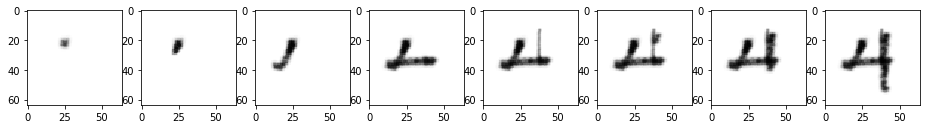

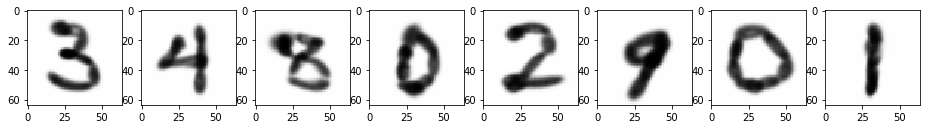

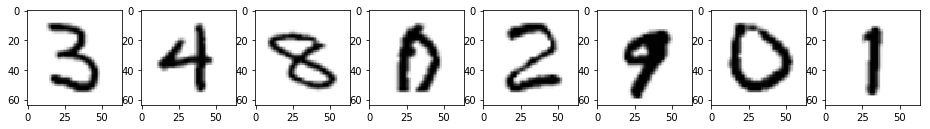

In [23]:
def run_actions_on_real_env(realEnv, actions_array):
  images = []
  realEnv.reset()
  for ac in actions_array:
    print(ac)
    realEnv.draw(ac)
    images.append(realEnv.image)
  plot_images(images)
run_actions_on_real_env(_realEnv, last_arr[0][:, 41, :])
plot_images(last_arr[1][40:48])
plot_images(last_arr[2][40:48])

# Generate GIFs

In [0]:
_realEnv = ColorEnv(args, paint_mode=PaintMode.CONNECTED_STROKES)

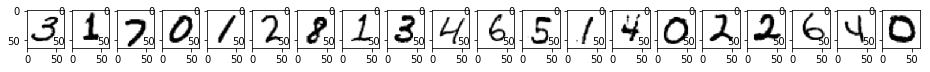

In [35]:
_ran_batch, _ = lol.get_random_batch(20)
_ran_batch.shape
plot_images(_ran_batch)

In [0]:
_last_actions, _fcstate, _int_canvases = lol.sess.run((lol.last_actions, lol.final_canvas_state, lol.intermediate_canvases), feed_dict={lol.target_image: _ran_batch})


In [37]:
_fcstate.shape

(20, 64, 64, 3)

In [38]:
_last_actions.shape

(8, 20, 12)

In [39]:
_int_canvases.shape

(8, 20, 64, 64, 3)

[0.5097132  0.59486556 0.53018945 0.29525772 0.57964194 0.30115092
 0.         0.         0.         0.47434267 0.3023697  0.        ]
[0.25738582 0.14262456 0.5363103  0.27585602 0.52124745 0.25834784
 0.         0.         0.         0.00496247 0.00267321 0.        ]
[0.36751404 0.3788039  0.59781015 0.2546385  0.6520468  0.26521552
 0.         0.         0.         0.00153801 0.00142843 0.        ]
[4.1437510e-01 4.1350281e-01 7.3747438e-01 2.8756189e-01 5.3635335e-01
 3.9536247e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 4.2197108e-04
 6.0871243e-04 0.0000000e+00]
[2.8688806e-01 3.8073674e-01 5.1623112e-01 3.7500757e-01 4.1244084e-01
 4.4369739e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.8935075e-04
 5.5736303e-04 0.0000000e+00]
[3.7230679e-01 4.3000698e-01 6.0393924e-01 3.9846092e-01 7.4606776e-01
 5.1594561e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 5.3772330e-04
 1.2061894e-03 0.0000000e+00]
[3.9608562e-01 4.6468797e-01 6.5188205e-01 5.9182703e-01 6.6139925e-01
 6.86317

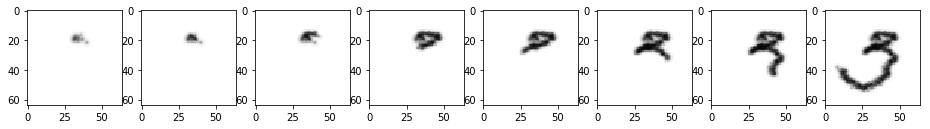

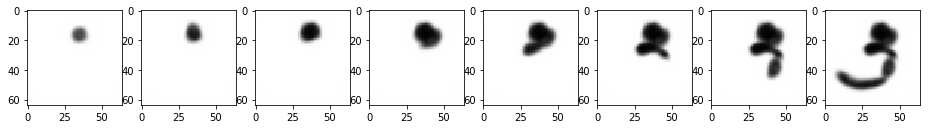

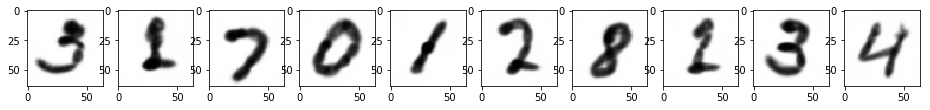

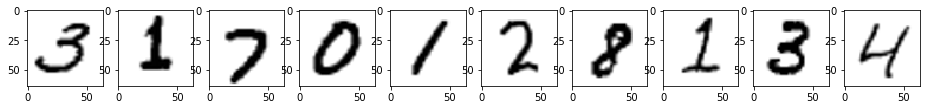

In [40]:
def run_actions_on_real_env(realEnv, actions_array):
  images = []
  realEnv.reset()
  for ac in actions_array:
    #ColorEnv.pretty_print_action(ac)
    #print('___')
    print(ac)
    realEnv.draw(ac)
    images.append(realEnv.image)
  return images
_imgs = run_actions_on_real_env(_realEnv, _last_actions[:, 0, :])
plot_images(_imgs)
plot_images(_int_canvases[:, 0, :, :])
plot_images(_fcstate[:10])
plot_images(_ran_batch[:10])

In [41]:
import imageio

_final_to_plot = []
for _target in range(20):
  run_actions_on_real_env(_realEnv, _last_actions[:, _target, :])
  print(len(_realEnv.intermediate_images))
  _realEnv.intermediate_images = _realEnv.intermediate_images[0::21]

  _inter_images = np.stack(_realEnv.intermediate_images)[:, :, :, :3].astype(np.float)/255.
  _target_images = np.tile(_ran_batch[_target].reshape(1, 64, 64, 3), [len(_realEnv.intermediate_images), 1, 1, 1])

  _plot = np.concatenate([_target_images, _inter_images], axis=2)
  _final_to_plot.append(_plot)

_rows = 5
_cols = 4
_rows_to_stack = []
for i in range(_rows):
  _rows_to_stack.append(np.concatenate(_final_to_plot[i*_cols:(i+1)*_cols], axis=2))


clip = mpy.ImageSequenceClip([x for x in (np.concatenate(_rows_to_stack, axis=1)*255).astype(np.uint8)], fps=14)
clip.write_videofile("hello.mp4")
display(mpy.ipython_display('hello.mp4', height=200))

[0.5097132  0.59486556 0.53018945 0.29525772 0.57964194 0.30115092
 0.         0.         0.         0.47434267 0.3023697  0.        ]
[0.25738582 0.14262456 0.5363103  0.27585602 0.52124745 0.25834784
 0.         0.         0.         0.00496247 0.00267321 0.        ]
[0.36751404 0.3788039  0.59781015 0.2546385  0.6520468  0.26521552
 0.         0.         0.         0.00153801 0.00142843 0.        ]
[4.1437510e-01 4.1350281e-01 7.3747438e-01 2.8756189e-01 5.3635335e-01
 3.9536247e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 4.2197108e-04
 6.0871243e-04 0.0000000e+00]
[2.8688806e-01 3.8073674e-01 5.1623112e-01 3.7500757e-01 4.1244084e-01
 4.4369739e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.8935075e-04
 5.5736303e-04 0.0000000e+00]
[3.7230679e-01 4.3000698e-01 6.0393924e-01 3.9846092e-01 7.4606776e-01
 5.1594561e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 5.3772330e-04
 1.2061894e-03 0.0000000e+00]
[3.9608562e-01 4.6468797e-01 6.5188205e-01 5.9182703e-01 6.6139925e-01
 6.86317

100%|██████████| 41/41 [00:00<00:00, 346.17it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: hello.mp4 



In [42]:

_stacked_plots = []
for _target in range(0, 20):
  run_actions_on_real_env(_realEnv, _last_actions[:, _target, :])
  print(len(_realEnv.intermediate_images))
  _realEnv.intermediate_images = _realEnv.intermediate_images[0::21]

  _inter_images = np.stack(_realEnv.intermediate_images)[:, :, :, :3].astype(np.float)/255.
  _intermediate_canvases_to_plot = np.repeat(_int_canvases[:, _target, :, :, :], 90, axis=0)[0::18]
  _target_images = np.tile(_ran_batch[_target].reshape(1, 64, 64, 3), [len(_realEnv.intermediate_images), 1, 1, 1])

  print(len(_realEnv.intermediate_images))
  print(_target_images.shape, _intermediate_canvases_to_plot.shape, _inter_images.shape)

  _plot = np.concatenate([_target_images, _intermediate_canvases_to_plot, _inter_images], axis=2)
  _stacked_plots.append(_plot)

  
#imageio.mimsave('hello2.gif', np.concatenate(_stacked_plots),'GIF', fps=14)
import moviepy.editor as mpy
from IPython.display import display
clip = mpy.ImageSequenceClip([x for x in (np.concatenate(_stacked_plots)*255).astype(np.uint8)], fps=14)
clip.write_videofile("hello2.mp4")
display(mpy.ipython_display('hello2.mp4', height=200))

[0.5097132  0.59486556 0.53018945 0.29525772 0.57964194 0.30115092
 0.         0.         0.         0.47434267 0.3023697  0.        ]
[0.25738582 0.14262456 0.5363103  0.27585602 0.52124745 0.25834784
 0.         0.         0.         0.00496247 0.00267321 0.        ]
[0.36751404 0.3788039  0.59781015 0.2546385  0.6520468  0.26521552
 0.         0.         0.         0.00153801 0.00142843 0.        ]
[4.1437510e-01 4.1350281e-01 7.3747438e-01 2.8756189e-01 5.3635335e-01
 3.9536247e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 4.2197108e-04
 6.0871243e-04 0.0000000e+00]
[2.8688806e-01 3.8073674e-01 5.1623112e-01 3.7500757e-01 4.1244084e-01
 4.4369739e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.8935075e-04
 5.5736303e-04 0.0000000e+00]
[3.7230679e-01 4.3000698e-01 6.0393924e-01 3.9846092e-01 7.4606776e-01
 5.1594561e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 5.3772330e-04
 1.2061894e-03 0.0000000e+00]
[3.9608562e-01 4.6468797e-01 6.5188205e-01 5.9182703e-01 6.6139925e-01
 6.86317

100%|██████████| 800/800 [00:00<00:00, 1547.88it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: hello2.mp4 

